<a href="https://colab.research.google.com/github/ShuaimingJing/XAI_assignment/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #5 Explainable ML
Name: Shuaiming Jing

In [1]:
!pip install numpy==1.25.2 matplotlib==3.7.1 tensorflow==2.14.1


In [24]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis
H0: ResNet50 **significantly relies** on the "head" region of animals for  classifying them.

H1: ResNet50 does **not significantly rely** on the "head" region of animals for classifying them.

# Test hypothesis using saliency map

**A brief explanation for saliency map:**

A saliency map is an interpretability tool used in deep learning, particularly for image classification models, to highlight which pixels or regions of an image are most important for the model's prediction. It visualizes the gradient of the model’s output with respect to the input image, showing how much each pixel influenced the classification decision.

In other words, a saliency map indicates the areas of focus in an image that the model relies on when making its prediction. Brighter regions in the map correspond to pixels that had a higher impact on the prediction, while darker regions had less influence.

Top Prediction: Indian_cobra 


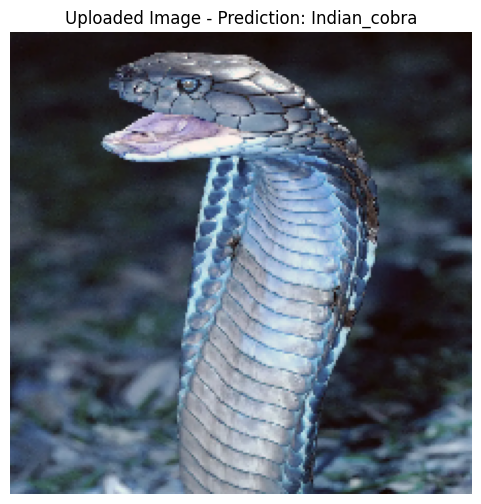

In [34]:
########### Get the classification results for an uploaded image

# Load the pre-trained model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
img_path = '/content/cobra.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Convert the numpy array to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img_array)

# Get model predictions
preds = model(img_tensor)

# Convert the predictions from Tensor to NumPy array
preds_numpy = preds.numpy()

# Decode the top prediction only
decoded_preds = decode_predictions(preds_numpy, top=1)[0]  # Get only the top 1 prediction

# Print the top predicted class and its probability
imagenet_id, label, score = decoded_preds[0]
print(f"Top Prediction: {label} ")

# Show the uploaded image
plt.figure(figsize=(6, 6))
plt.imshow(image.array_to_img(img_array[0]))  # Convert back to image format and display
plt.title(f"Uploaded Image - Prediction: {label}")
plt.axis('off')
plt.show()

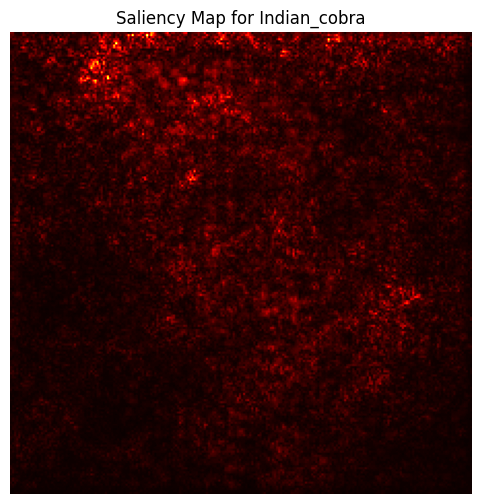

In [27]:
############ Get the saliency map

# Get the index of the predicted class
class_idx = tf.argmax(preds[0])

# Set up GradientTape to compute gradients
with tf.GradientTape() as tape:
    tape.watch(img_tensor)  # Watch the input image tensor
    preds = model(img_tensor)
    top_class_output = preds[:, class_idx]  # Focus on the predicted class

# Compute gradients of the top predicted class with respect to the input image
grads = tape.gradient(top_class_output, img_tensor)

# Compute the absolute value of the gradients to get the saliency map
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

# Normalize the saliency map for visualization
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))

# Plot the saliency map
plt.figure(figsize=(6, 6))
plt.imshow(saliency, cmap='hot')
plt.title(f'Saliency Map for {label}')
plt.axis('off')
plt.show()

**Explanation:** According to the saliency map for the cobra, the head region is the part where ResNet50 mainly focuses on to do the classification due to the brighter red.

Top Prediction: beaver 


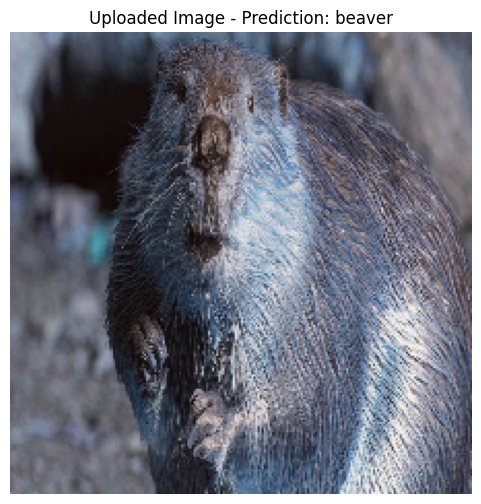

In [33]:
########### Get the classification results for an uploaded image

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
img_path = '/content/beaver.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Convert the numpy array to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img_array)

# Get model predictions
preds = model(img_tensor)

# Convert the predictions from Tensor to NumPy array
preds_numpy = preds.numpy()

# Decode the top prediction only
decoded_preds = decode_predictions(preds_numpy, top=1)[0]  # Get only the top 1 prediction

# Print the top predicted class and its probability
imagenet_id, label, score = decoded_preds[0]
print(f"Top Prediction: {label} ")

# Show the uploaded image
plt.figure(figsize=(6, 6))
plt.imshow(image.array_to_img(img_array[0]))  # Convert back to image format and display
plt.title(f"Uploaded Image - Prediction: {label}")
plt.axis('off')
plt.show()

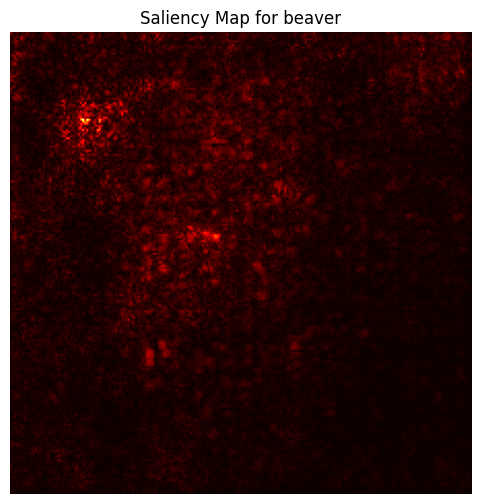

In [30]:
############ Get the saliency map

# Get the index of the predicted class
class_idx = tf.argmax(preds[0])

# Set up GradientTape to compute gradients
with tf.GradientTape() as tape:
    tape.watch(img_tensor)  # Watch the input image tensor
    preds = model(img_tensor)
    top_class_output = preds[:, class_idx]  # Focus on the predicted class

# Compute gradients of the top predicted class with respect to the input image
grads = tape.gradient(top_class_output, img_tensor)

# Compute the absolute value of the gradients to get the saliency map
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

# Normalize the saliency map for visualization
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))

# Plot the saliency map
plt.figure(figsize=(6, 6))
plt.imshow(saliency, cmap='hot')
plt.title(f'Saliency Map for {label}')
plt.axis('off')
plt.show()

**Explanation:** According to the saliency map for the beaver, the head region (mouth) plays an role for ResNet50 to do the classification, but not the most important area. The background information at top left provides the most important information for the model.

Top Prediction: fox_squirrel 


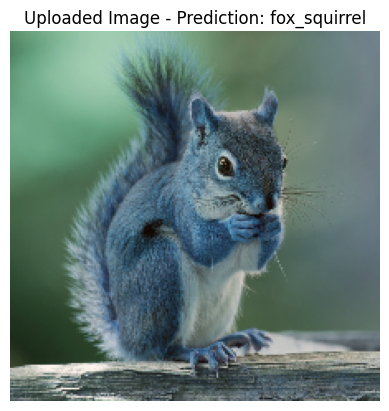

In [31]:
########### Get the classification results for an uploaded image

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
img_path = '/content/squirrel.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Convert the numpy array to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img_array)

# Get model predictions
preds = model(img_tensor)

# Convert the predictions from Tensor to NumPy array
preds_numpy = preds.numpy()

# Decode the top prediction only
decoded_preds = decode_predictions(preds_numpy, top=1)[0]  # Get only the top 1 prediction

# Print the top predicted class and its probability
imagenet_id, label, score = decoded_preds[0]
print(f"Top Prediction: {label} ")

# Show the uploaded image
plt.imshow(image.array_to_img(img_array[0]))  # Convert back to image format and display
plt.title(f"Uploaded Image - Prediction: {label}")
plt.axis('off')
plt.show()

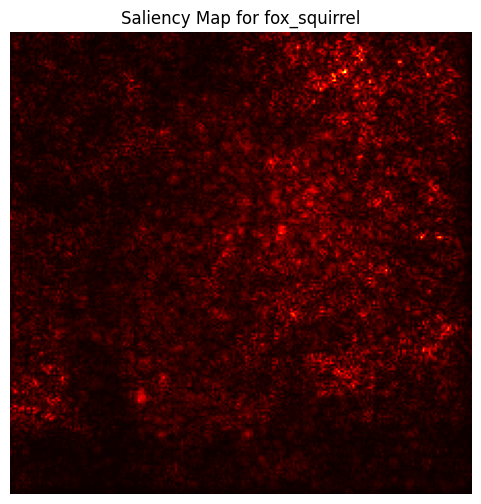

In [32]:
############ Get the saliency map

# Get the index of the predicted class
class_idx = tf.argmax(preds[0])

# Set up GradientTape to compute gradients
with tf.GradientTape() as tape:
    tape.watch(img_tensor)  # Watch the input image tensor
    preds = model(img_tensor)
    top_class_output = preds[:, class_idx]  # Focus on the predicted class

# Compute gradients of the top predicted class with respect to the input image
grads = tape.gradient(top_class_output, img_tensor)

# Compute the absolute value of the gradients to get the saliency map
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

# Normalize the saliency map for visualization
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))

# Plot the saliency map
plt.figure(figsize=(6, 6))
plt.imshow(saliency, cmap='hot')
plt.title(f'Saliency Map for {label}')
plt.axis('off')
plt.show()

**Explanation:** According to the saliency map for the squirrel, head region plays a very important role for the model to make the prediction. In addition, some background information at the top right also provides the same important information as the head region. (not sure why this happening)

Top Prediction: beaver 


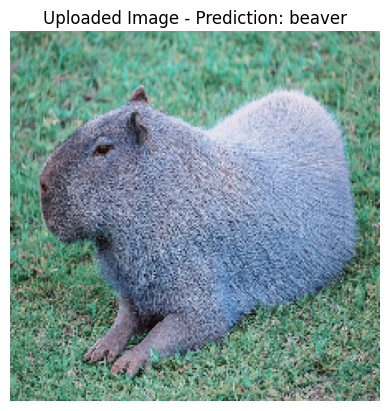

In [35]:
########### Get the classification results for an uploaded image

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# Load and preprocess the image
img_path = '/content/capybara.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Convert the numpy array to a TensorFlow tensor
img_tensor = tf.convert_to_tensor(img_array)

# Get model predictions
preds = model(img_tensor)

# Convert the predictions from Tensor to NumPy array
preds_numpy = preds.numpy()

# Decode the top prediction only
decoded_preds = decode_predictions(preds_numpy, top=1)[0]  # Get only the top 1 prediction

# Print the top predicted class and its probability
imagenet_id, label, score = decoded_preds[0]
print(f"Top Prediction: {label} ")

# Show the uploaded image
plt.imshow(image.array_to_img(img_array[0]))  # Convert back to image format and display
plt.title(f"Uploaded Image - Prediction: {label}")
plt.axis('off')
plt.show()

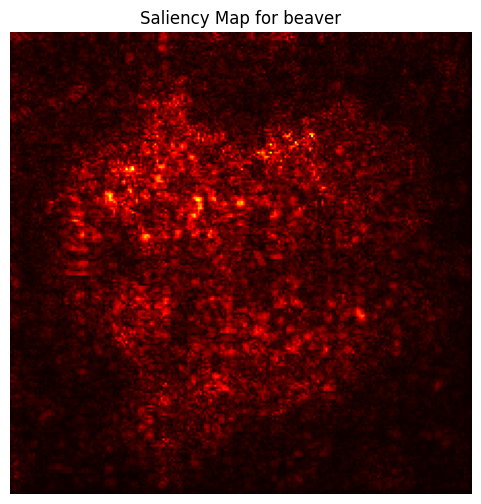

In [36]:
############ Get the saliency map

# Get the index of the predicted class
class_idx = tf.argmax(preds[0])

# Set up GradientTape to compute gradients
with tf.GradientTape() as tape:
    tape.watch(img_tensor)  # Watch the input image tensor
    preds = model(img_tensor)
    top_class_output = preds[:, class_idx]  # Focus on the predicted class

# Compute gradients of the top predicted class with respect to the input image
grads = tape.gradient(top_class_output, img_tensor)

# Compute the absolute value of the gradients to get the saliency map
saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

# Normalize the saliency map for visualization
saliency = (saliency - tf.reduce_min(saliency)) / (tf.reduce_max(saliency) - tf.reduce_min(saliency))

# Plot the saliency map
plt.figure(figsize=(6, 6))
plt.imshow(saliency, cmap='hot')
plt.title(f'Saliency Map for {label}')
plt.axis('off')
plt.show()

**Explanation:** Even though the model makes the wrong prediction this time (it's a capybara), it still heavily relies on the inforamtion about the head region to make the prediction. And the model gives the wrong prediction this time probably due to this similarity between a capybara and a beaver.

# Conclusion:

The null hypothesis is rejected. ResNet50 relies on the information of the head region of animals to make classifcation. The importance of the head regions may vary according to different species, and the model always relies on the head region to give the prediction (even though it may not be correct).

Some interesting findings: In addition to the head region, the background also provides important information for the model to give the predictions. Some guesses: The model might be relying on the context or background surrounding the animals to make more accurate predictions. For example, animals might often appear in specific environments, and the model is picking up on these environmental cues to help with classification. However, the model may be overfitting to the background in certain cases, meaning it's learning to associate specific backgrounds with specific classes. This could become an issue if the background information is irrelevant or misleading in real-world scenarios where the object may appear in different settings.

All in all, more images should be used in the future to test my guesses, and just 4 images are way more not enough.